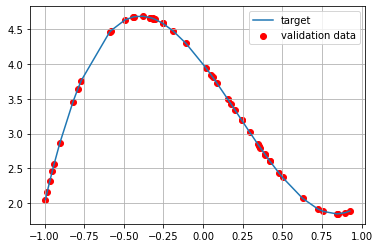

In [82]:
import numpy as np
import matplotlib.pyplot as plt

a = 3
b = -2
c = -3 
d = 4

def f(x):

    return a * (x ** 3) + b * (x ** 2) + c * (x) + d

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()

y_target = f(x_valid)

sigma = 0.0
y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K
from keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='relu'))
model.add(Dense(50))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [84]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 10)                20        
                                                                 
 dense_38 (Dense)            (None, 50)                550       
                                                                 
 dense_39 (Dense)            (None, 30)                1530      
                                                                 
 dense_40 (Dense)            (None, 10)                310       
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,421
Trainable params: 2,421
Non-trainable params: 0
_________________________________________________________________


In [85]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/100
16/16 [==============================] - 1s 22ms/step - loss: 2.4503 - mse: 2.4503 - val_loss: 0.8845 - val_mse: 0.8845
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6318 - mse: 0.6318 - val_loss: 0.7498 - val_mse: 0.7498
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4866 - mse: 0.4866 - val_loss: 0.5993 - val_mse: 0.5993
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3784 - mse: 0.3784 - val_loss: 0.5569 - val_mse: 0.5569
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.2777 - mse: 0.2777 - val_loss: 0.3664 - val_mse: 0.3664
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1991 - mse: 0.1991 - val_loss: 0.2860 - val_mse: 0.2860
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1570 - mse: 0.1570 - val_loss: 0.2879 - val_mse: 0.2879
Epoch 8/100
16/16 [==============================] - 0s 10ms/step - loss: 0.1228 -

In [86]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044

Test loss: 0.0043760063126683235
Test accuracy: 0.004376006778329611


In [87]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - mse: 0.0044

Test loss: 0.0043760063126683235
Test accuracy: 0.004376006778329611


4/4 [==============================] - 0s 3ms/step


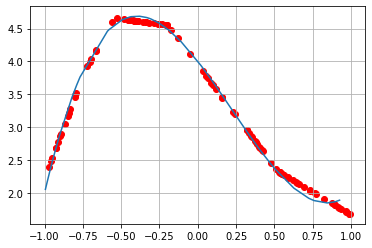

In [88]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Risultati

Tanh nel layer intermedio migliori risultati (0.0045 loss vs 0.008 loss)
Layer singolo con pù neuroni risultati peggiori di layer multipli con meno neuroni (single 200, multiple 50, 30, 20)

